In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [126]:
url="https://www.hubertiming.com/results/2018MLK"
html=urlopen(url)

In [127]:
soup = BeautifulSoup(html)

In [128]:
title = soup.title
print (title)
print(title.text)

<title>Race results for the 2018 MLK Dream Run!</title>
Race results for the 2018 MLK Dream Run!


In [129]:
links = soup.find_all('a',href=True)
for link in links:
     print(link['href'])
print(links)

https://www.mlkdreamrun.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2018MLK10K
/results/2018MLK15K
/results/summary/2018MLK
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
[<a href="https://www.mlkdreamrun.com/" target="_blank">MLK Dream Run</a>, <a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>, <a href="https://www.hubertiming.com">Huber Timing Home</a>, <a class="btn btn-primary btn-lg" href="/results/2018MLK10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 10K</a>, <a class="btn btn-primary btn-lg" href="/results/2018MLK15K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 15K</a>, <a class="btn btn-primary btn-lg" href="/results/summary/2018MLK" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>, <a data-url="/results/2018MLK" href="#tabs-1" id="rootTab" style="font-size: 18px">5K Results</

In [130]:
data =[]
allrows = soup.find_all("tr")
for row in allrows:
    row_list = row.find_all("td")
    dataRow = []
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
data= data[5:]
print(data[-2:])

[['190', '2087', '\r\n\r\n                    LEESHA POSEY\r\n\r\n                ', 'F', '43', 'PORTLAND', '1:33:53', '30:17', '\r\n\r\n                    112 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    36 of 37\r\n\r\n                ', '0:00', '1:33:53'], ['191', '1216', '\r\n\r\n                    ZULMA OCHOA\r\n\r\n                ', 'F', '40', 'GRESHAM', '1:43:27', '33:22', '\r\n\r\n                    113 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    37 of 37\r\n\r\n                ', '0:00', '1:43:27']]


In [131]:
df = pd.DataFrame(data)
print(df.head(2))
print(df.tail(2))

  0     1                                                  2  3   4   \
0  1  1191  \r\n\r\n                    MAX RANDOLPH\r\n\r...  M  29   
1  2  1080  \r\n\r\n                    NEED NAME KAISER R...  M  25   

           5      6     7                                                  8   \
0  WASHINGTON  16:48  5:25  \r\n\r\n                    1 of 78\r\n\r\n   ...   
1    PORTLAND  17:31  5:39  \r\n\r\n                    2 of 78\r\n\r\n   ...   

        9                                                  10    11     12  
0  M 21-39  \r\n\r\n                    1 of 33\r\n\r\n   ...  0:08  16:56  
1  M 21-39  \r\n\r\n                    2 of 33\r\n\r\n   ...  0:09  17:40  
      0     1                                                  2  3   4   \
189  190  2087  \r\n\r\n                    LEESHA POSEY\r\n\r...  F  43   
190  191  1216  \r\n\r\n                    ZULMA OCHOA\r\n\r\...  F  40   

           5        6      7   \
189  PORTLAND  1:33:53  30:17   
190   GRESHAM

In [132]:
header_list =[]
col_headers = soup.find_all('th')
for col in col_headers:
    header_list.append(col.text)
print(header_list)


['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'Chip Time', 'Chip Pace', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [133]:
 df.columns = header_list
 print(df.head())

  Place   Bib                                               Name Gender Age  \
0     1  1191  \r\n\r\n                    MAX RANDOLPH\r\n\r...      M  29   
1     2  1080  \r\n\r\n                    NEED NAME KAISER R...      M  25   
2     3  1275  \r\n\r\n                    DAN FRANEK\r\n\r\n...      M  52   
3     4  1223  \r\n\r\n                    PAUL TAYLOR\r\n\r\...      M  54   
4     5  1245  \r\n\r\n                    THEO KINMAN\r\n\r\...      M  22   

         City Chip Time Chip Pace  \
0  WASHINGTON     16:48      5:25   
1    PORTLAND     17:31      5:39   
2    PORTLAND     18:15      5:53   
3    PORTLAND     18:31      5:58   
4                 19:31      6:17   

                                        Gender Place Age Group  \
0  \r\n\r\n                    1 of 78\r\n\r\n   ...   M 21-39   
1  \r\n\r\n                    2 of 78\r\n\r\n   ...   M 21-39   
2  \r\n\r\n                    3 of 78\r\n\r\n   ...   M 40-54   
3  \r\n\r\n                    4 of 78

In [134]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Place            191 non-null    object
 1   Bib              191 non-null    object
 2   Name             191 non-null    object
 3   Gender           191 non-null    object
 4   Age              191 non-null    object
 5   City             191 non-null    object
 6   Chip Time        191 non-null    object
 7   Chip Pace        191 non-null    object
 8   Gender Place     191 non-null    object
 9   Age Group        191 non-null    object
 10  Age Group Place  191 non-null    object
 11  Time to Start    191 non-null    object
 12  Gun Time         191 non-null    object
dtypes: object(13)
memory usage: 19.5+ KB


In [135]:
df.shape


(191, 13)

In [136]:
df2=df.dropna(how='any')
df2.shape


(191, 13)

In [137]:
df2['Chip Time'][0:152] = df2['Chip Time'][0:152] + ":00"
df2['ChipTime_minutes'] = pd.to_timedelta(df2['Chip Time'])
df2['ChipTime_minutes'] = df2['ChipTime_minutes'].astype('timedelta64[s]') /60
print(df2[['ChipTime_minutes']].head())

   ChipTime_minutes
0            1008.0
1            1051.0
2            1095.0
3            1111.0
4            1171.0


Text(0.5, 1.0, 'comparison of average time run by male and female')

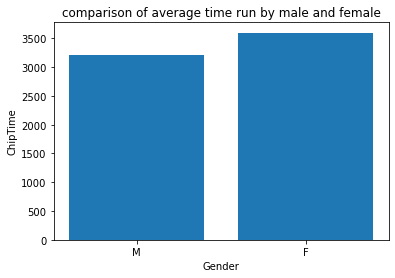

In [138]:
plt.bar(df2['Gender'],df2['ChipTime_minutes'])
plt.xlabel('Gender')
plt.ylabel('ChipTime')
plt.title("comparison of average time run by male and female")

In [139]:
df2.describe(include=[np.number])

,ChipTime_minutes
count,191.000000
mean,1774.745986
std,1030.807445
min,60.016667
25%,1501.000000
50%,1791.000000
75%,2510.000000
max,3598.000000


Text(0, 0.5, 'Run Time')

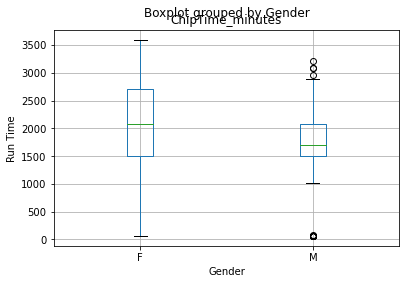

In [140]:
df2.boxplot(column='ChipTime_minutes',by='Gender')
plt.ylabel('Run Time')

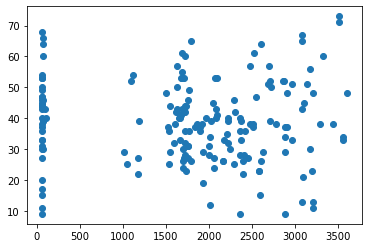

In [141]:
df2['Age_i'] = round(pd.to_numeric(df2['Age'],errors='coerce'))
df2.dropna(how='any',inplace = True)

plt.scatter(df2['ChipTime_minutes'],df2['Age_i'])
plt.show()
               
               